In [1]:
import matplotlib.pyplot as plt
import numpy as np
from urllib.request import Request, urlopen
import scipy.optimize
import json

## Get Chia Space data

In [2]:
domain=Request("https://api2.chiaexplorer.com/chart/netSpace")

# Fake a header, so we bypass their security
domain.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:78.0) Gecko/20100101 Firefox/78.0')
response = urlopen(domain)
output = response.read().decode('utf-8')
data = json.loads(output)   

## Extract data to Numpy

- time is in hour

- space is in Petabytes

In [3]:
time = np.array(data['timestamp'])
space = np.array(data['data'])
time = time/3600000
time = time - time[0]

Text(0.5, 0, 'time (hours)')

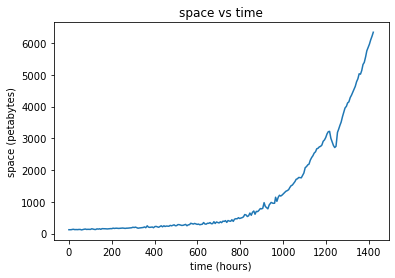

In [4]:
plt.plot(time, space)
plt.title("space vs time")
plt.ylabel('space (petabytes)')
plt.xlabel('time (hours)')

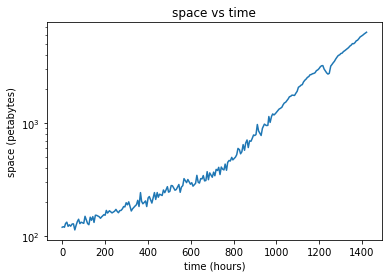

In [5]:
plt.plot(time, space)
plt.title("space vs time")
plt.ylabel('space (petabytes)')
plt.xlabel('time (hours)')
plt.yscale('log')

In [6]:
def monoExp(x, m, t, b):
    return m * np.exp(t * x) + b

Text(0.5, 0, 'time (hours)')

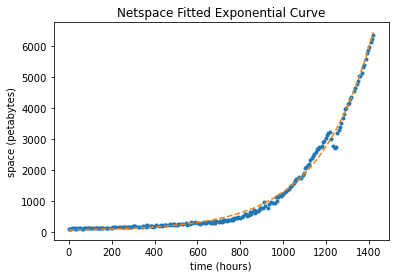

In [7]:
# perform the fit
p0 = (1, 0.001, 0.01) # start with values near those we expect

params, cv = scipy.optimize.curve_fit(monoExp, time, space, p0)
m, t, b = params
# plot the results
plt.plot(time, space, '.', label="data")
plt.plot(time, monoExp(time, m, t, b), '--', label="fitted")
plt.title("Netspace Fitted Exponential Curve")
plt.ylabel('space (petabytes)')
plt.xlabel('time (hours)')

In [8]:
print(f'Doubling time: {np.log(2)/t} hours, {np.log(2)/t/24} days')

Doubling time: 178.46335335272707 hours, 7.435973056363628 days


In [9]:
future_time = np.linspace(0,999, 1000)

Text(0.5, 0, 'time (hours)')

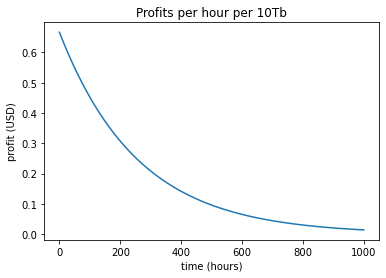

In [10]:
plt.plot(future_time, 16/24*np.exp(-t * future_time), )
plt.title('Profits per hour per 10Tb')
plt.ylabel('profit (USD)')
plt.xlabel('time (hours)')

In [16]:
print(f'Total ROE on a 10TB drive: US${np.sum(16/24*np.exp(-t * future_time))}')

Total ROE on a 10TB drive: US$168.4415926161549
